In [2]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Optional: make plots appear in notebook
%matplotlib inline


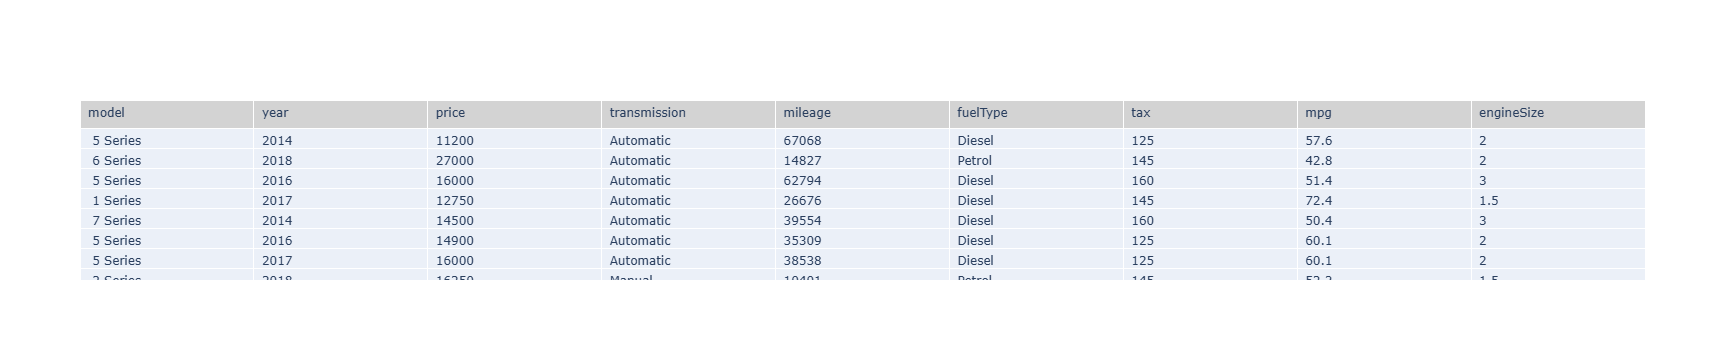

In [60]:
df = pd.read_csv("C:/Users/lenovo/Downloads/bmw.csv")
import plotly.graph_objects as go
fig = go.Figure(data=[go.Table(
    header=dict(
        values=list(df.columns),
        fill_color='lightgrey',
        align='left'
    ),
    cells=dict(
        values=[df[col].head(100) for col in df.columns],
        align='left'
    )
)])

fig.show()

In [10]:
# 3️⃣ Clean dataset
df = df.drop_duplicates()
df = df.dropna(subset=['price','mileage','engineSize','year'])
df['price'] = df['price'].astype(float)
df['mileage'] = df['mileage'].astype(float)
df['engineSize'] = df['engineSize'].astype(float)
df['tax'] = df['tax'].astype(float)
df['mpg'] = df['mpg'].astype(float)
df.reset_index(drop=True, inplace=True)

# Check cleaned data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10664 entries, 0 to 10663
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10664 non-null  object 
 1   year          10664 non-null  int64  
 2   price         10664 non-null  float64
 3   transmission  10664 non-null  object 
 4   mileage       10664 non-null  float64
 5   fuelType      10664 non-null  object 
 6   tax           10664 non-null  float64
 7   mpg           10664 non-null  float64
 8   engineSize    10664 non-null  float64
dtypes: float64(5), int64(1), object(3)
memory usage: 624.9+ KB


In [13]:
# 4️⃣ Compute KPIs
avg_price = df['price'].mean()
avg_mileage = df['mileage'].mean()
avg_tax = df['tax'].mean()
avg_mpg = df['mpg'].mean()


print("🔹 Average Price:", round(avg_price, 2))
print("🔹 Average Mileage:", round(avg_mileage, 2))
print("🔹 Average Tax:", round(avg_tax, 2))
print("🔹 Average MPG:", round(avg_mpg, 2))

🔹 Average Price: 22692.89
🔹 Average Mileage: 25710.98
🔹 Average Tax: 131.6
🔹 Average MPG: 56.48


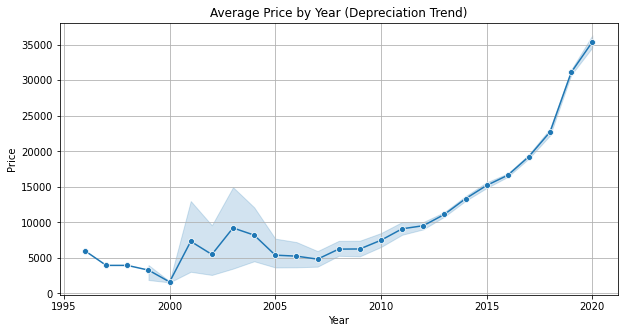

In [16]:
# a) Depreciation Trend: Price vs Year
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='year', y='price', marker='o')
plt.title("Average Price by Year (Depreciation Trend)")
plt.xlabel("Year")
plt.ylabel("Price")
plt.grid(True)
plt.show()

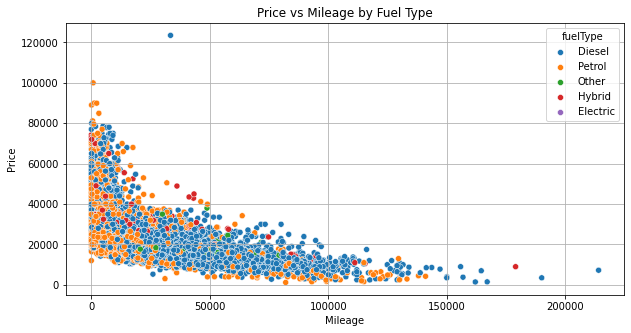

In [19]:
# b) Price vs Mileage
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='mileage', y='price', hue='fuelType')
plt.title("Price vs Mileage by Fuel Type")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.grid(True)
plt.show()

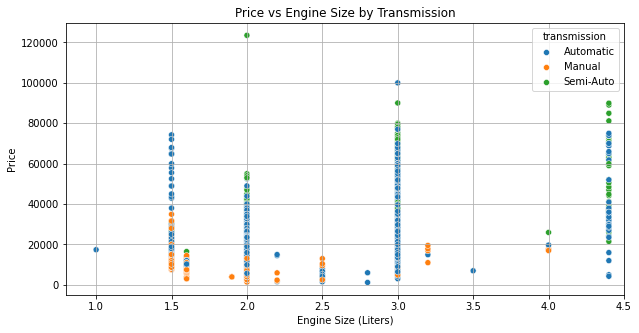

In [25]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='engineSize', y='price', hue='transmission')

plt.title("Price vs Engine Size by Transmission")
plt.xlabel("Engine Size (Liters)")
plt.ylabel("Price")
plt.xlim(0.8, 4.5)
plt.grid(True)
plt.show()


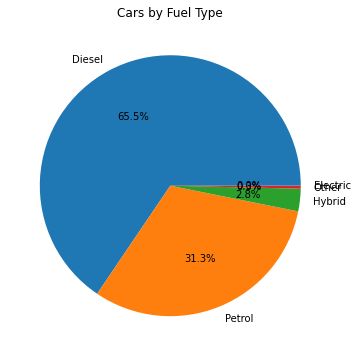

In [30]:
# d) Cars by Fuel Type (Pie Chart)
df['fuelType'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6,6))
plt.title("Cars by Fuel Type")
plt.ylabel("")
plt.show()


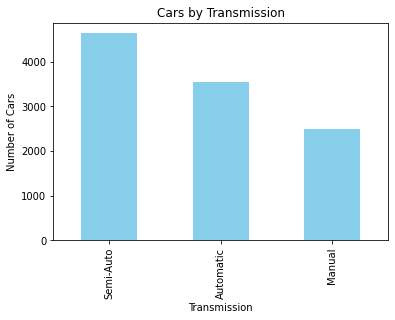

In [33]:
# e) Cars by Transmission (Bar Chart)
df['transmission'].value_counts().plot.bar(color='skyblue')
plt.title("Cars by Transmission")
plt.xlabel("Transmission")
plt.ylabel("Number of Cars")
plt.show()

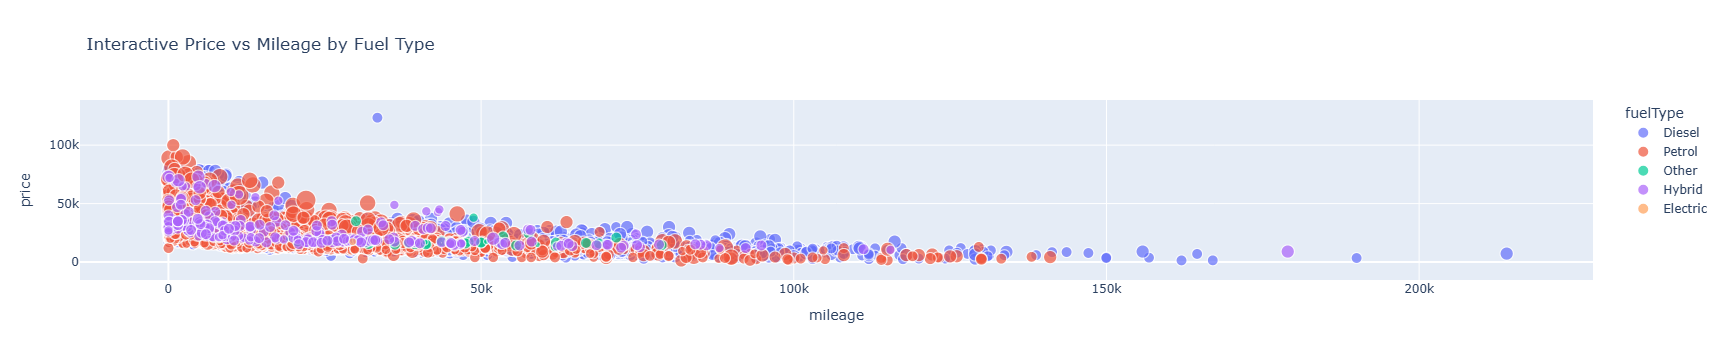

In [36]:
# 6️⃣ Optional Interactive Plot (Plotly)
fig = px.scatter(
    df,
    x='mileage',
    y='price',
    color='fuelType',
    size='engineSize',
    hover_data=['model', 'year', 'transmission'],
    title="Interactive Price vs Mileage by Fuel Type"
)
fig.show()

In [39]:
# 7️⃣ Insights (Markdown style)
print("\n### Insights from BMW Dataset:")
print("1️⃣ Cars with higher mileage (>100,000 km) tend to have lower prices.")
print("2️⃣ Diesel cars generally retain higher resale value than petrol cars.")
print("3️⃣ Cars with larger engine sizes (>3.0L) are more expensive.")
print("4️⃣ Depreciation is steepest in the first 3-5 years after manufacture.")
print("5️⃣ Automatic cars tend to have slightly higher prices than manual cars.")



### Insights from BMW Dataset:
1️⃣ Cars with higher mileage (>100,000 km) tend to have lower prices.
2️⃣ Diesel cars generally retain higher resale value than petrol cars.
3️⃣ Cars with larger engine sizes (>3.0L) are more expensive.
4️⃣ Depreciation is steepest in the first 3-5 years after manufacture.
5️⃣ Automatic cars tend to have slightly higher prices than manual cars.


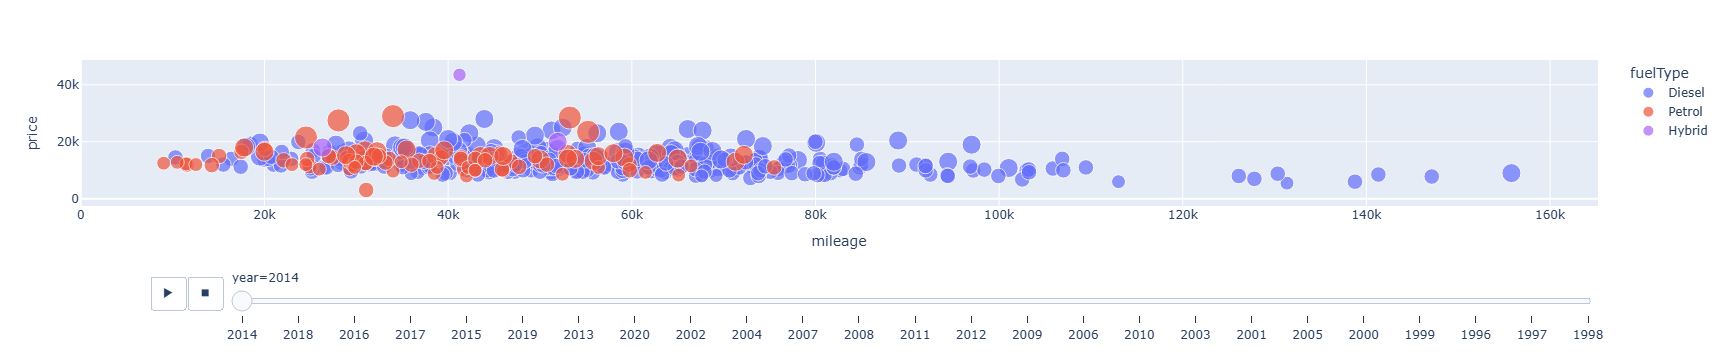

In [42]:
import plotly.express as px

fig = px.scatter(df, x='mileage', y='price', color='fuelType',
                 size='engineSize', hover_data=['model', 'year', 'transmission'],
                 animation_frame='year')  # Optional: animate by year
fig.show()


In [45]:
top5_expensive = df.groupby('model')['price'].mean().sort_values(ascending=False).head(5)
print(top5_expensive)


model
 X7          69842.763636
 8 Series    63997.794872
 M5          57760.000000
 i8          57012.588235
 X6          43838.613208
Name: price, dtype: float64


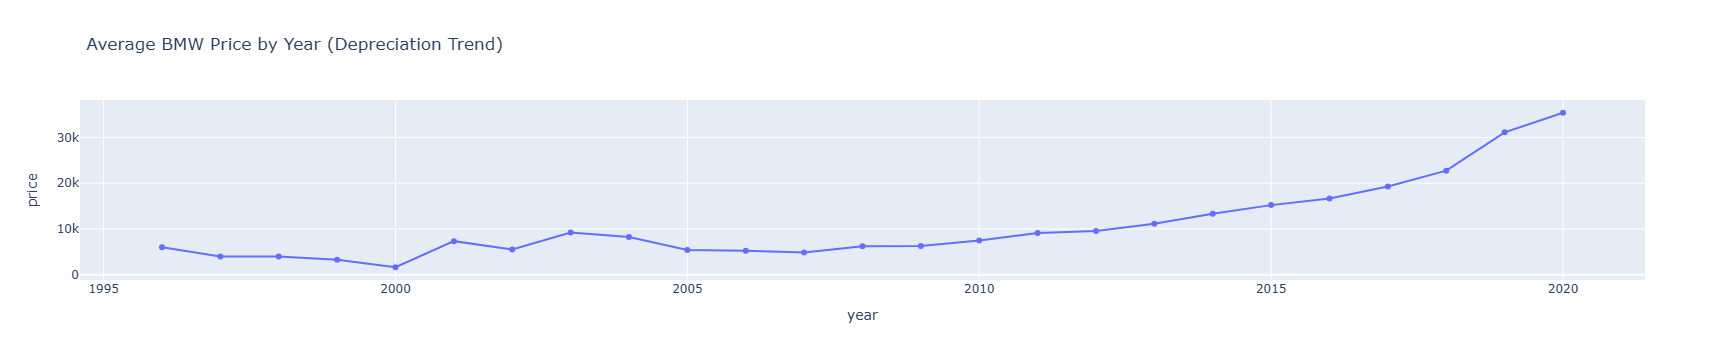

In [48]:
fig = px.line(df.groupby('year')['price'].mean().reset_index(),
              x='year', y='price', markers=True,
              title="Average BMW Price by Year (Depreciation Trend)")
fig.show()


In [51]:
# Basic + new KPIs
avg_price = df['price'].mean()
median_price = df['price'].median()
max_price = df['price'].max()
min_price = df['price'].min()
avg_mileage = df['mileage'].mean()
avg_engine = df['engineSize'].mean()
most_common_fuel = df['fuelType'].mode()[0]
automatic_count = df[df['transmission']=='Automatic'].shape[0]
manual_count = df[df['transmission']=='Manual'].shape[0]
old_cars_pct = len(df[df['year'] <= 2019])/len(df)*100
high_mileage_pct = len(df[df['mileage']>100000])/len(df)*100

# Display KPIs
print(f"🔹 Average Price: {avg_price:.2f}")
print(f"🔹 Median Price: {median_price:.2f}")
print(f"🔹 Max Price: {max_price:.2f}")
print(f"🔹 Min Price: {min_price:.2f}")
print(f"🔹 Average Mileage: {avg_mileage:.2f}")
print(f"🔹 Average Engine Size: {avg_engine:.2f} L")
print(f"🔹 Most Common Fuel Type: {most_common_fuel}")
print(f"🔹 Automatic Cars: {automatic_count}, Manual Cars: {manual_count}")
print(f"🔹 % of Cars Older than 5 Years: {old_cars_pct:.1f}%")
print(f"🔹 % of Cars with Mileage >100,000 km: {high_mileage_pct:.1f}%")


🔹 Average Price: 22692.89
🔹 Median Price: 20261.50
🔹 Max Price: 123456.00
🔹 Min Price: 1200.00
🔹 Average Mileage: 25710.98
🔹 Average Engine Size: 2.17 L
🔹 Most Common Fuel Type: Diesel
🔹 Automatic Cars: 3542, Manual Cars: 2485
🔹 % of Cars Older than 5 Years: 93.2%
🔹 % of Cars with Mileage >100,000 km: 1.2%
